<a href="https://colab.research.google.com/github/osmarbraz/exemplos_gensim/blob/master/Exemplo_Gensim_pt_br_NILC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Word Embedding(pt-br) usando Gensim e NILC(pt-br)

Exemplo de embendding usando Gensim Python Library com execução através do Google Colaboratory.<br>
É Biblioteca open-source para modelagem de tópicos não supervisionados e processamento de linguagem.
Implementado em Python e Cython. 
Projetado para lidar com grandes volumes de texto, usando fluxo de dados e algoritmos on-line incrementais. 
Seu diferencial em relação a maioria dos outros software para aprendizado de máquina os quais visam apenas o processamento em memória.<br>

http://nilc.icmc.usp.br/embeddings





# Preparação do ambiente
Preparação do ambiente para executar o gensim.

##Tratamento de logs

In [1]:
#Biblioteca de logging
import logging

#Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parâmetros
Parâmetros da execução do teste

Nome dos modelos em http://nilc.icmc.usp.br/embeddings.

In [2]:

#Definição do nome do arquivo compactado do modelo
arquivoModeloCompactado = 'cbow_s300.zip'

#Definição do nome do arquivo do modelo
arquivoModelo = 'cbow_s300.txt'

logging.info('Parâmetros definidos!')

## Instalação

Instalando o gensim no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".


In [3]:
#!pip install -U gensim
!pip install -U gensim==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## Bibliotecas

## Download
Para usar o Gensim, você pode criar o seu vetor de palavras e treiná-lo ou utilizar um dataset previamente treinado.

Neste apresentação utilizamos o dataset fornecido por Kyubyong Park, disponível em http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s300.zip

São dados da Wikipidia Brasileira com:<br>
*   300 dimensões
*   1G Corpus
*   50246 vocabulário

Outros modelos em  :
http://nilc.icmc.usp.br/embeddings

In [4]:
# Realiza o download do arquivo do modelo para o diretório corrente
!wget -O $arquivoModeloCompactado http://143.107.183.175:22980/download.php?file=embeddings/word2vec/$arquivoModeloCompactado 

--2022-11-24 16:10:19--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s300.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929305948 (886M) [application/octet-stream]
Saving to: ‘cbow_s300.zip’

cbow_s300.zip       100%[===================>] 886.25M  9.96MB/s    in 85s     

2022-11-24 16:11:44 (10.4 MB/s) - ‘cbow_s300.zip’ saved [929305948/929305948]



Descompacta o arquivo do modelo.

In [5]:
!unzip -o -j -q "$arquivoModeloCompactado" -d "."

logging.info("Terminei a descompactação.")

Mostra o diretório corrente e seus arquivos.

In [6]:
!pwd
!ls -la

/content
total 3501348
drwxr-xr-x 1 root root       4096 Nov 24 16:11 .
drwxr-xr-x 1 root root       4096 Nov 24 16:09 ..
-rw-r--r-- 1 root root 2656045531 Oct  4  2018 cbow_s300.txt
-rw-r--r-- 1 root root  929305948 Nov 24 16:11 cbow_s300.zip
drwxr-xr-x 4 root root       4096 Nov 22 00:13 .config
drwxr-xr-x 1 root root       4096 Nov 22 00:14 sample_data


# Prepara o modelo
Carrega as bibliotecas e modelo pré treinado para executar os exemplos.

##Importando as bibliotecas do Gensim
Importa as biblitecas do Gensim para carregar o modelo pré treinado.

In [7]:
from IPython.display import display, HTML
from jinja2 import Template

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

logging.info('Import realizado!')

##Carregando o modelo

In [8]:
model = KeyedVectors.load_word2vec_format(arquivoModelo)
logging.info('Modelo carregado!')

Mostra alguns dados do modelo carregado para saber se ele foi carregado.

In [9]:
print(model)

Mostra os dados da palavra rei.

In [10]:
model.most_similar('rei')

[('monarca', 0.7051045298576355),
 ('imperador', 0.6941140294075012),
 ('príncipe-herdeiro', 0.663498044013977),
 ('ex-rei', 0.6500978469848633),
 ('príncipe', 0.6440467834472656),
 ('príncipe-regente', 0.6145505905151367),
 ('faraó', 0.611543595790863),
 ('sacro-imperador', 0.6109637022018433),
 ('cardeal-rei', 0.6039718389511108),
 ('duque', 0.6022941470146179)]

##Função de apresentação dos dados
Função para melhorar a apresentação dos dados dos exemplos.

In [11]:
table_list_template = """ 
<table> 
        <tr>  
           <th>Palavra</th>   
           <th>Similaridade</th>   
        </tr>  
        {% for item in items%}  
        <TR>     
           <TD class="c1">{{item[0]}}</TD>     
           <TD class="c2">{{item[1]}}</TD>   
        </TR>   
        {% endfor %}
</table> 
"""
def most_similar(positive, negative):
    nn = model.most_similar(positive=positive, negative=negative)
    tmpl = Template(table_list_template)
    output_html = tmpl.render(items=nn)
    return HTML(output_html)

logging.info('Função criada')

# Exemplos

**DICA**:<br>
Para palavras com sinais léxicos, utilizar o caractere "**u**" antes da mesma para codifica-la como utf-8.


## Comparando palavras diferentes

Rei + Mulher – Homem = ?

In [12]:
most_similar(positive=['rei','mulher'], negative=['homem'])

Palavra,Similaridade,esposa,0.5980843305587769,sobrinha,0.5735378265380859,meia-irmã,0.569114089012146,filha,0.5606812238693237,rainha,0.5509544610977173,irmã,0.5464290976524353,princesa,0.5403075814247131,neta,0.5377060174942017,mãe,0.5363210439682007,madrasta,0.5213463306427002


Rainha + Homem – Mulher = ?

In [13]:
most_similar(positive=[u'rainha',u'homem'], negative=[u'mulher'])

Palavra,Similaridade,rei,0.5078852772712708,epigrama,0.43968552350997925,monarca,0.4394603967666626,mito,0.4353425204753876,demônio,0.42243558168411255,mago,0.413475900888443,homen,0.4116077423095703,rapaz,0.410883367061615,monstro,0.40994980931282043,gênio,0.4092741012573242


Brasil + Criminalidade = ?

In [14]:
most_similar(positive=['brasil',u'criminalidade'], negative=[])

Palavra,Similaridade,romildão,0.5606801509857178,japão,0.5581530928611755,ocidente,0.5306658148765564,emtanto,0.5266503095626831,pradã£o,0.5266128778457642,sesc-bosque,0.5166740417480469,melville's,0.5136715173721313,markkleeberg,0.5073782205581665,eixo-x,0.5069652795791626,romildã£o,0.506879448890686


Outros exemplos:

In [15]:
most_similar(positive=['presidente'], negative=['poder'])

Palavra,Similaridade,vice-presidente,0.5089801549911499,presi-dente,0.47608375549316406,ex-presidente,0.4745274782180786,presidenta,0.4283314347267151,primeiro-secretário,0.39531469345092773,diretor-presidente,0.37890052795410156,diretor-geral,0.3661661148071289,co-presidente,0.361783504486084,comissá-rio,0.3568294644355774,pre-sidente,0.35632336139678955


In [16]:
most_similar(positive=['brasil','estudo'], negative=['carnaval'])

Palavra,Similaridade,haiti,0.4247499704360962,dmsumm,0.4115537405014038,estu-do,0.403529554605484,documento-quadro,0.40114015340805054,palamismo,0.3907535970211029,experimento,0.38947948813438416,ocidente,0.3839944005012512,megaprocesso,0.3821256756782532,melhoramento,0.3810884654521942,mediter-râneo,0.380667120218277


In [17]:
most_similar(positive=['brasil','universidade'], negative=[])

Palavra,Similaridade,japão,0.5480386018753052,s.luiz,0.5061563849449158,brasil.,0.5030791759490967,lu-xemburgo,0.49644121527671814,fancie's,0.49367067217826843,рmbito,0.4910694658756256,liceu,0.4909440279006958,de-curso,0.48979490995407104,romildão,0.4891167879104614,m.i.t,0.4881156384944916


In [18]:
most_similar(positive=[u'homem',u'máquina'], negative=[])

Palavra,Similaridade,maquina,0.5467665195465088,demônio,0.5251299738883972,garoto,0.5249305367469788,rapaz,0.5177508592605591,rapazola,0.5176842212677002,réprobo,0.5162155628204346,trombadinha,0.5161904692649841,demónio,0.5135754346847534,ladrão,0.5064061284065247,aeromodelo,0.5057721138000488


In [19]:
most_similar(positive=[u'palio',u'vw'], negative=[u'fiat'])

Palavra,Similaridade,fiorino,0.45830926299095154,uno,0.45438170433044434,hb00,0.42453569173812866,doblò,0.4176793098449707,ducato,0.40537846088409424,punto,0.3872108459472656,croma,0.38625824451446533,volkswagen,0.38463282585144043,mobi,0.38212788105010986,escort,0.3818145990371704


In [20]:
most_similar(positive=[u'roma',u'alemanha'], negative=[u'itália'])

Palavra,Similaridade,jerusalém,0.51436847448349,florença,0.4793848991394043,eichstätt,0.4690265953540802,nuremberga,0.4689272940158844,amsterdã,0.4626407027244568,berlim,0.4599156081676483,montecassino,0.45623740553855896,atenas,0.45602965354919434,prenzlau,0.45584172010421753,königsberg,0.44187259674072266


In [21]:
most_similar(positive=[u'lendo',u'jogado'], negative=[u'lido'])

Palavra,Similaridade,jogando,0.5391992330551147,descansando,0.4768054783344269,perseguindo,0.4647257924079895,dormindo,0.4628775119781494,roubando,0.44974321126937866,empurrando,0.4411602020263672,bisbilhotando,0.427745521068573,polindo,0.42519015073776245,pisando,0.4222061038017273,redecorando,0.4153454899787903


In [22]:
most_similar(positive=[u'nuvens',u'estrela'], negative=[u'nuvem'])

Palavra,Similaridade,estrelas,0.5497429966926575,plêiades,0.379197895526886,colinas,0.3746805191040039,trovoadas,0.373703271150589,sombras,0.3734194040298462,pombas,0.3726757764816284,corredoras,0.3640727698802948,cigarras,0.36065393686294556,galáxias,0.35754913091659546,luas,0.3575345277786255


In [23]:
most_similar(positive=[u'tenista',u'futebol'], negative=[u'tênis'])

Palavra,Similaridade,ciclista,0.6033629179000854,ex-tenista,0.5473562479019165,golfista,0.5451231598854065,basquetebolista,0.5346209406852722,judoca,0.522477388381958,futebolista,0.513012707233429,naturalizado,0.5003874897956848,ex-ciclista,0.4770185351371765,canoísta,0.47275108098983765,velejador,0.47246378660202026


In [24]:
most_similar(positive=[u'tenista',u'xadrez'], negative=[u'tênis'])	

Palavra,Similaridade,ciclista,0.49740028381347656,golfista,0.47812965512275696,judoca,0.47449177503585815,enxadrista,0.4301517605781555,canoísta,0.4274108409881592,atleta,0.4134063422679901,velejador,0.4117974638938904,maratonista,0.4111607074737549,ex-tenista,0.4102421700954437,velocista,0.4084324836730957


## Comparando palavras iguais

Frase de exemplo

In [25]:
texto = "Depois de roubar o cofre do banco,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [26]:
palavras = [texto.split()]
print(palavras)

[['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco,', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']]


Carrega o vocabulário do modelo somente com as palavras dos texto

In [27]:
model1 = Word2Vec(palavras, min_count=1)

print(model1)

Word2Vec(vocab=16, size=100, alpha=0.025)


Imprime o vocabulário.

In [28]:
words = list(model1.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco,
7 ladrão
8 banco
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


A palavra banco possui somente uma entrada no modelo somente um conjunto de pesos.

In [29]:
print(model1['banco'])

[ 3.25359963e-03 -4.86859726e-03 -2.92567490e-03  1.76069210e-03
 -1.37138867e-03 -1.57461187e-03 -2.31146184e-03 -4.93300287e-03
 -4.22948692e-03  4.37001744e-03  3.84283718e-03  2.30299961e-03
  4.62942902e-04  4.41116979e-03  2.30099284e-03  4.78144642e-03
 -4.50822583e-04  4.67667868e-03  4.21139924e-03 -4.32990964e-05
 -3.81652219e-03  4.77001630e-03 -3.92756367e-04 -4.49122908e-03
 -3.08144116e-03 -4.59068734e-03 -1.56292517e-03  5.99743325e-05
 -1.32819568e-03  1.55033136e-03 -4.71906550e-03 -3.76741518e-03
 -3.01435543e-03 -4.81817733e-05  3.36168008e-03 -1.41841650e-03
  1.74603250e-03 -2.86820601e-03  4.57657268e-04  4.32852749e-03
  1.37844193e-03  1.98784401e-03  3.61376209e-03  2.85308599e-03
 -7.81862589e-04 -3.19188205e-03  1.83628802e-03 -3.77510046e-03
 -2.06908793e-03  3.42536648e-03 -7.80016300e-04  3.22483759e-03
  8.44241935e-04  3.92624270e-03  3.37853958e-03 -1.58080063e-03
  3.37531860e-03  2.69317185e-04  4.61358204e-03 -7.72478001e-04
 -4.86088730e-03 -4.10365

# Plotando gráficos

Para plotar um conjunto de palavras execute o script abaixo:

In [31]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

def plot_words(words):    
    #Carrega o vetor das palavras a serem plotadas
    vectors = []
    for word in words:    
         vectors.append(model[word])
    #Ajustar um modelo 2D de PCA aos vetores
    pca = PCA(n_components=2)
    resultado = pca.fit_transform(vectors)
    #Criar um gráfico de dispersão da projeção
    pyplot.scatter(resultado[:, 0], resultado[:, 1])
    #Adiciona as palavras no gráfico
    for i in range(len(words)):
        pyplot.annotate(words[i], xy=(resultado[i, 0], resultado[i, 1]))        
    #Mostra o gráfico
    pyplot.show()
logging.info('Função criada')

O comando abaixo plota o gráfico das palavras especificadas.

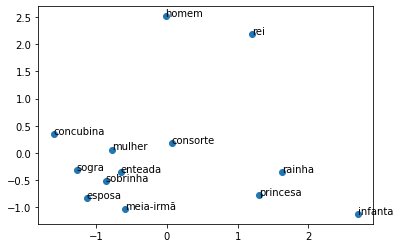

In [32]:
plot_words(['rei', 'rainha', 'homem', 'mulher','esposa','concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada'])

Lista as palavras do vocabulário

In [33]:
words = list(model.wv.vocab)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Visualizando o modelo

Aqui tentamos visualizar a conexão entre as seguintes palavras em um subespaço 2D

### Função de visualização

In [34]:
#Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotar_words(Wl):
    #Carrega o vetor das palavras a serem plotadas
    Wv = []
    for i in range(len(Wl)):
       Wv.append(model[Wl[i]])

    #Queremos um subespaço onde Wv[0]-Wv[1] e Wv[2]-Wv[3] sejam as linhas do eixo, 
    #então essas 4 palavras estão no eixo correspondente
    b1 = (Wv[1]-Wv[0])
    b2 = (Wv[3]-Wv[2])

    #Transforma a lista de embeddings em um vetor simples
    W = np.array(Wv)
    #Transforma as diferenças em um vetor simples
    B = np.array([b1,b2])
    #Calcula o pseudo-inversa de uma matriz
    Bi = np.linalg.pinv(B.T)

    #Multiplica Bi e W.T
    Wp = np.matmul(Bi,W.T)
    #Calcula os pivos
    Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

    #Dimensões da figura
    plt.figure(figsize=(12,7))
    #Adiciona linha vertical
    plt.axvline()
    #Adiciona linha horizontal
    plt.axhline()
    #Criar um gráfico de dispersão da projeção
    plt.scatter(Wp[0,:], Wp[1,:])
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    eps = 0.005
    #Adiciona as palavras no gráfico
    for i, txt in enumerate(Wl):
        plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    #Mostra o gráfico
    plt.show()

logging.info('Função criada')

#### Exemplo

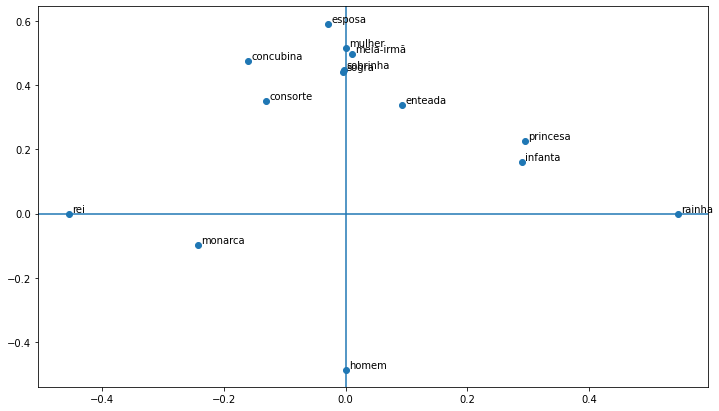

In [35]:
Wl =['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']
plotar_words(Wl)

#### Detalhamento da função

Import das bibliotecas

In [36]:
#Import das bibliotecas
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Lista de palavras a serem visualizadas

In [37]:
#Lista das palavras
Wl = ['rei', 'rainha', 'homem', 'mulher','esposa', 'monarca', 'concubina', 'infanta','princesa','meia-irmã','sogra','sobrinha','consorte', 'enteada']

#Lista dos embeddings das palavras
Wv = []
for i in range(len(Wl)):
    Wv.append(model[Wl[i]])

Queremos um subespaço onde rei-rainha e homem-mulher são as linhas do eixo, então essas 4 palavras estão no eixo correspondente




In [38]:
#Diferença de Wv[1]-Wv[0]
b1 = (Wv[1]-Wv[0])
#Diferença de Wv[3]-Wv[2]
b2 = (Wv[3]-Wv[2])

Queremos que a base seja (1,0) e (0,1) do espaço projetado. Com uma matriz quadrada, devemos calcular a matriz inversa para obter os vetores base. No entanto, a matriz não quadrada tem apenas pseudo-inversa.

In [39]:
#Transforma a lista de embeddings em um vetor simples
W = np.array(Wv)
#Transforma as diferenças em um vetor simples
B = np.array([b1,b2])
#Calcula o pseudo-inversa de uma matriz
Bi = np.linalg.pinv(B.T)

In [40]:
#Mostra as dimensões de B e W
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 14)


Projete todas as incorporações de palavras no subespaço 2D.

  Temos que mudar as linhas rei-rainha e homem-mulher para o eixo.

In [41]:
#Multiplica Bi e W.T
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
#Calcula os pivos
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 14)


Vamos colocar as palavras no plano cartesiano!

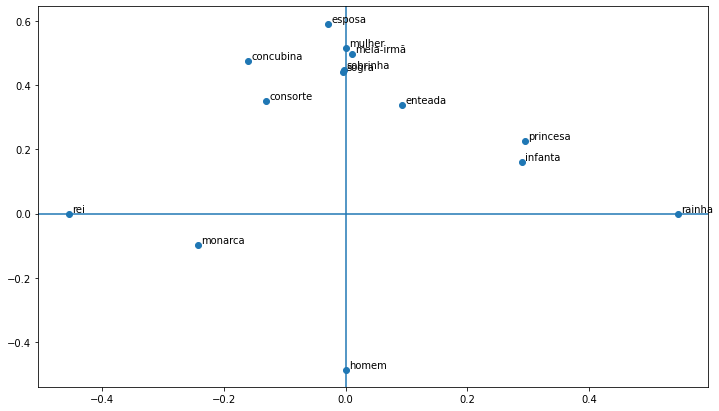

In [42]:
#Dimensões da figura
plt.figure(figsize=(12,7))
#Adiciona linha vertical
plt.axvline()
#Adiciona linha horizontal
plt.axhline()
#Plota eixo x e y
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
#Percore a lista de palavras
for i, txt in enumerate(Wl):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()

# Exemplo comparando os embeddings das ocorrências da palavra "banco" em uma sentença. 

## Comparando embeddings de palavras

In [43]:
texto = "Depois de roubar o cofre do banco ,"\
        " o ladrão de banco foi visto " \
        "sentado no banco da praça central."

logging.info('Texto armazenado!')

In [44]:
palavras = texto.split()
print(palavras)

['Depois', 'de', 'roubar', 'o', 'cofre', 'do', 'banco', ',', 'o', 'ladrão', 'de', 'banco', 'foi', 'visto', 'sentado', 'no', 'banco', 'da', 'praça', 'central.']


Confirmando os tokens do documento

In [45]:
i = 0
for token in palavras:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 o
9 ladrão
10 de
11 banco
12 foi
13 visto
14 sentado
15 no
16 banco
17 da
18 praça
19 central.


Gera os embeddings

In [46]:
model = Word2Vec([palavras], min_count=1)

print(model)

Word2Vec(vocab=16, size=100, alpha=0.025)


Palavras recuperadas do modelo

In [47]:
words = list(model.wv.vocab)
i = 0
for token in words:
   print(i, token)
   i = i + 1

0 Depois
1 de
2 roubar
3 o
4 cofre
5 do
6 banco
7 ,
8 ladrão
9 foi
10 visto
11 sentado
12 no
13 da
14 praça
15 central.


Exibe os embenddings das palavras

A banco aparece somente no índices 6.

As outras ocorrências foram retiradas pois possuem a mesma representação.


In [48]:
# Índice das palavras a serem comparadas
palavra1 = 6
palavra2 = 11
palavra3 = 16

print("Os primeiros 5 valores de cada instância de \"banco\".")
print("")

print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])
print(str(words[palavra1]), model[words[palavra1]][:5])

Os primeiros 5 valores de cada instância de "banco".

banco [ 0.00325565 -0.00486553 -0.00292941  0.00176024 -0.00137261]
banco [ 0.00325565 -0.00486553 -0.00292941  0.00176024 -0.00137261]
banco [ 0.00325565 -0.00486553 -0.00292941  0.00176024 -0.00137261]


In [49]:
# Importando as bibliotecas
from scipy.spatial.distance import cosine

# Índice das palavras a serem comparadas
print("Período:", texto)
print("Palavra 1 =", palavra1, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 2 =", palavra2, "=", str(words[palavra1]), "(instituição financeira)")
print("Palavra 3 =", palavra3, "=", str(words[palavra1]), "(assento)")

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "banco da praça" (diferentes significados).
#banco_diferente = doc[palavra2].similarity(doc[palavra3])
banco_diferente = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra2,",",palavra3,"):  %.2f" % banco_diferente)

# Calcula a similaridade de coseno entre as palavras banco
# Em "ladrão de banco" versus "cofre do banco" (mesmo significado).
mesmo_banco = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para mesmo significado(",palavra2,",",palavra1,"):  %.2f" % mesmo_banco)

# Calcula a similaridade de coseno entre as palavras banco
# Em "cofre do banco" versus "banco da praça" (diferente significados).
banco_diferente2 = 1 - cosine(model[words[palavra1]], model[words[palavra1]])

print("Vetor de similaridade  para diferentes significados(",palavra3,",",palavra1,"):  %.2f" % banco_diferente2)

Período: Depois de roubar o cofre do banco , o ladrão de banco foi visto sentado no banco da praça central.
Palavra 1 = 6 = banco (instituição financeira)
Palavra 2 = 11 = banco (instituição financeira)
Palavra 3 = 16 = banco (assento)
Vetor de similaridade  para diferentes significados( 11 , 16 ):  1.00
Vetor de similaridade  para mesmo significado( 11 , 6 ):  1.00
Vetor de similaridade  para diferentes significados( 16 , 6 ):  1.00


# Exemplo de palavras individuais

In [50]:
texto = "pilha fila enfileirar empilhar"
palavras = [texto.split()]
print(palavras)

[['pilha', 'fila', 'enfileirar', 'empilhar']]


In [51]:
model = Word2Vec(palavras, min_count=1)

In [52]:
print(model['pilha'])

[ 4.4205412e-03 -3.3344005e-03  2.5902698e-03 -4.5570452e-03
 -2.4121650e-03 -3.0271090e-03  3.8977354e-03  3.4575416e-03
 -4.8241196e-03  3.5464720e-04 -5.6532572e-04 -4.9236598e-03
 -4.2033428e-03  4.2848042e-03  2.6360261e-03 -2.4340963e-03
 -1.6354413e-03  1.3591980e-03 -3.9963787e-03  4.8641590e-03
  1.0397960e-03  4.4969496e-04 -1.1560485e-03  4.5175883e-03
  6.4847659e-04  5.6436115e-06 -1.1052603e-03  1.7430115e-03
  2.7854459e-03  3.2085434e-03  4.3023759e-03 -3.8121031e-03
 -2.7574615e-03  1.0677043e-03 -3.4783608e-03 -4.4587180e-03
  3.4520675e-03  1.3300796e-03  3.2883331e-03  4.8306072e-03
 -4.9024220e-03  1.9287645e-03  3.4216004e-03  1.6497367e-03
 -2.8381755e-03 -2.1871574e-04  4.6158507e-03  2.5884602e-03
  4.3806960e-03  3.5393730e-04  4.4048312e-03 -8.5252954e-04
 -3.9416063e-03 -3.6751141e-03 -8.5314468e-04 -2.4633296e-03
  6.0111372e-05  7.9985132e-04  3.7705053e-03 -3.1429022e-03
 -1.4089197e-03  1.0194387e-03 -3.3019227e-03 -2.3455424e-03
  6.8024138e-04  1.63469

In [53]:
print(model['fila'])

[-4.4393460e-03 -3.7704760e-03 -3.8713152e-03  4.7795852e-03
 -9.1009383e-04  3.3770434e-03 -1.2555018e-03 -3.6051469e-03
 -2.7627053e-04 -1.8010809e-03  9.5735083e-04  3.6683122e-03
  4.7131306e-03 -1.6395005e-03 -4.3658522e-04  1.3184415e-03
  1.0406809e-03 -2.8984623e-03  3.2481316e-03 -2.7426165e-03
 -1.1202507e-03  6.5393469e-05  2.3375065e-03  4.1461806e-03
 -4.4215247e-03  1.7188473e-03 -8.5614133e-04 -1.2692198e-03
  3.7080536e-03 -1.3860363e-03 -2.4971073e-03  1.3377086e-03
  1.2527076e-04 -4.3644552e-05  1.2559695e-03  1.7090789e-03
 -2.5253597e-04 -3.7550824e-03 -4.4704545e-03  1.0509341e-03
  1.7107503e-03 -1.7141565e-03 -3.3286368e-03  4.6976884e-03
  4.7020568e-03  6.6165056e-04 -1.7253465e-03  2.3112472e-03
 -2.5539792e-03 -4.0095192e-03 -4.0545138e-03  5.2156221e-05
 -2.6796849e-03 -6.1317958e-04 -3.1241702e-03 -3.8077782e-03
  4.6088928e-03 -8.3930138e-04 -3.4657819e-04  1.0339058e-03
  3.1448551e-03 -9.5048061e-05  3.6817009e-03  1.0285500e-03
 -3.5571456e-03 -7.67851

In [54]:
print(model['empilhar'])

[-0.00359719  0.00281328  0.002352    0.00138032  0.00234632  0.00018669
  0.00025915 -0.00024549  0.0014142   0.00082662  0.00476895  0.00210609
  0.00034342 -0.00117471 -0.00135425  0.00363    -0.00044904 -0.00119547
  0.00434847 -0.00015553 -0.0020005  -0.00222132  0.00409169  0.00366691
  0.00190106 -0.0013925   0.00353291  0.00163033 -0.00190053  0.00379068
 -0.00077253 -0.00279879 -0.00268963  0.00391403  0.00156628 -0.00140629
  0.00049819  0.00068504 -0.00424149  0.00211297  0.00417218 -0.00391018
 -0.00434754 -0.00462615 -0.00425164  0.00462276  0.00248153  0.00413709
  0.00244148  0.0037515  -0.00288056  0.00148921  0.00455533  0.00485038
  0.002315   -0.00431872 -0.0048117   0.00121592  0.0030828   0.00294453
  0.00261081 -0.00359022  0.00108454  0.0046308  -0.00216905  0.00393061
  0.00106699 -0.00184163 -0.00443138  0.00479672 -0.00482725 -0.00313882
  0.0038342   0.00140316  0.00142194  0.00185584  0.00493169  0.00187396
 -0.00376898 -0.00188475 -0.00168618  0.00091356  0

In [55]:
print(model['enfileirar'])

[ 4.8680226e-03  5.3767988e-04  4.5426278e-03 -4.2567968e-05
 -2.5014761e-03  4.7774520e-03  1.2499228e-04 -2.8005319e-03
 -3.0851565e-04  3.0299202e-03  2.6700431e-03 -1.4659726e-03
 -2.4507677e-03  1.7094845e-03  2.0798345e-03 -1.8549943e-03
  1.7648914e-03  3.8412383e-03  4.0599536e-03 -4.6679373e-03
  2.9878572e-03  3.8366555e-04  3.6620293e-03 -3.9743274e-03
  1.7371088e-03  2.4429683e-03 -3.8318711e-03  2.4141828e-03
 -4.4986536e-03 -1.9924042e-03 -1.6820218e-03 -2.5707257e-03
 -2.3879141e-03 -2.4870997e-03 -1.4398021e-03 -4.6360749e-03
  4.6948907e-03  2.5420436e-03 -3.3686911e-03  1.9728837e-03
  1.3020685e-03  4.6245081e-05 -2.1348828e-03  1.8276543e-03
  1.3254640e-03 -2.3622361e-03 -3.0273735e-04 -1.9953768e-03
 -6.8318500e-04  1.3718837e-03 -1.3355343e-03 -2.2378175e-03
  4.0088133e-03 -3.5029026e-03 -1.5698930e-03 -1.0023166e-03
 -2.4551136e-04 -4.1339877e-03 -4.9467511e-03  3.1871742e-04
 -1.8472369e-04  3.9052276e-03  2.0486729e-03 -4.2651370e-03
 -9.9488604e-04  2.66804